In [1]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time



Using TensorFlow backend.


In [3]:
# adjust this to point to your downloaded/trained model
model_path = os.path.join('/Users/caterina/Documents/DataScience/PosteItaliane/model','Secondo.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [4]:
labels_to_names = {0: 'dummy', 1: 'large block buildings', 2: 'small villas'}

In [14]:
image = read_image_bgr('/Users/caterina/Documents/DataScience/PosteItaliane/TrainingCamp_Data/Test_set/images/000000000.jpg')


In [15]:
# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

processing time:  6.397150993347168


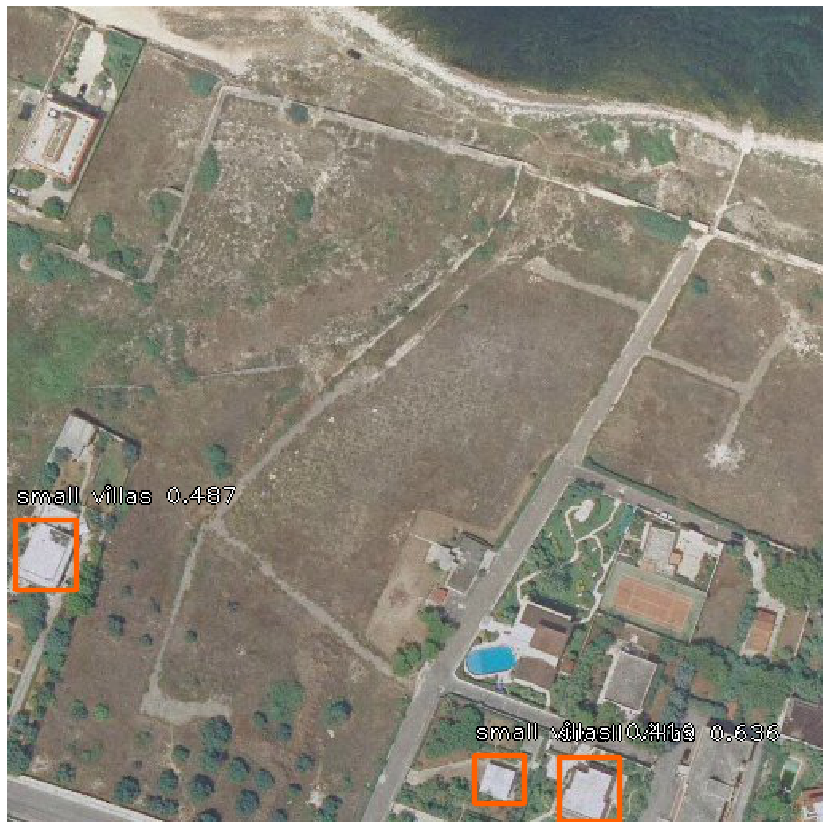

In [16]:
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.4:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()

In [24]:
import pandas as pd
csv = pd.read_csv("Output_2.csv", sep=";",index_col=0) 

In [27]:
csv.sort_values(by="Image", axis=0)
csv.head()

,Image,xMin,yMin,xMax,yMax,Class,Confidence
0,000001384.jpg,"9,890329","104,693565","44,273582","139,49585",2,"0,53931487"
1,000000071.jpg,"0,0","295,0603","236,11963","457,61212",1,"0,503542"
2,000000059.jpg,"161,66324","404,44473","190,45729","442,0092",2,"0,47904372"
3,000000059.jpg,"175,58505","348,48685","204,2708","385,18182",2,"0,46009654"
4,000000059.jpg,"265,8855","172,69504","306,0974","206,14308",2,"0,4519028"
